In [8]:
#importing libraries
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

In [9]:
#Loading data in dataframe

url = "https://github.com/notpeter/crunchbase-data/blob/master/companies.csv?raw=true"
df = pd.read_csv(url, encoding= 'latin1', header = 0)
df = df.drop([df.columns[0]], axis = 1)
df.head()           

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               66367 non-null  object
 1   homepage_url       61310 non-null  object
 2   category_list      63220 non-null  object
 3   funding_total_usd  66368 non-null  object
 4   status             66368 non-null  object
 5   country_code       59410 non-null  object
 6   state_code         57821 non-null  object
 7   region             58338 non-null  object
 8   city               58340 non-null  object
 9   funding_rounds     66368 non-null  int64 
 10  founded_at         51147 non-null  object
 11  first_funding_at   66344 non-null  object
 12  last_funding_at    66368 non-null  object
dtypes: int64(1), object(12)
memory usage: 6.6+ MB
None


Percentage of missing values in each column
name                  0.001507
homepage_url          7.621143
category_list         

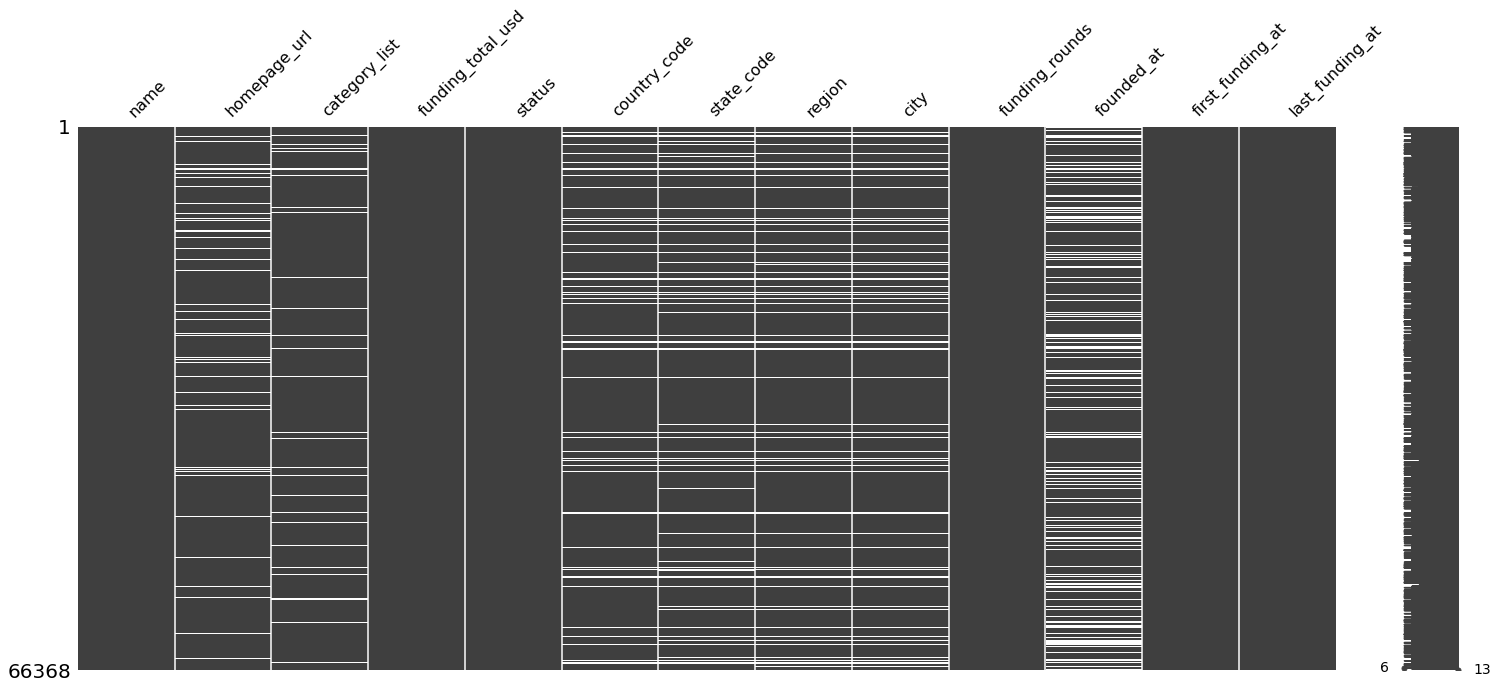

In [10]:
#General info about data
print(df.info())
print('\n')

#Missing values
print('Percentage of missing values in each column')
print(df.isna().mean() * 100)
mn.matrix(df)



In [11]:
#Understanding missing values data
df.loc[df.name.isna(),['homepage_url','status','country_code']]

,homepage_url,status,country_code
56916,http://tellitin10.com,closed,USA


In [12]:
#Assess dtype of funding_total_usd column
print(df.funding_total_usd.str.isnumeric().value_counts())
print('\n')
print(df.funding_total_usd[df.funding_total_usd.str.isalnum() == False].value_counts())

True     52645
False    13723
Name: funding_total_usd, dtype: int64


-                   12785
27391.4567872378        4
559018.363753249        2
117805.981402362        2
2319019.82761953        2
                    ...  
1127486.55614127        1
13326421.678749         1
494256.736719322        1
854551.299528369        1
14997712.9480056        1
Name: funding_total_usd, Length: 925, dtype: int64


In [13]:
#Function to clean data (handle missing values, categorical variables, ambiguity in data representation like date format etc

def clean_data(df):
  #missing values 
  #(the main features of interest are 'name','category_list','funding_total_usd','country_code','region')
  df.dropna(subset = ['name','category_list','funding_total_usd','country_code','region'])

  #Categorical Variables
  #Clean '-' values from 'funding_total_usd' column
  df = df[df.funding_total_usd != '-']
  #Updating dtype
  df.funding_total_usd = df.funding_total_usd.apply(lambda x: float(x))

  #Extracting subset of mid size companies based on valuation (eliminating very small & very big companies)
  df = df[(df.funding_total_usd > 10000000) & (df.funding_total_usd < 200000000)]  #comapnies that raides between $10mn and $200mn

  return df

In [14]:
df = clean_data(df)
print(df.shape, df.info)

(12648, 13) <bound method DataFrame.info of                                       name  ... last_funding_at
7                                   H2O.ai  ...      2015-11-09
21     Beijing 1000CHI Software Technology  ...      2010-04-01
25                                 ZenChef  ...      2015-11-04
32                                1010data  ...      2010-03-08
40                            10X Genomics  ...      2015-01-12
...                                    ...  ...             ...
66350              Zynerba Pharmaceuticals  ...      2014-10-14
66353                             Zyngenia  ...      2010-09-09
66354                              Zynstra  ...      2014-07-09
66355                               ZYOMYX  ...      2014-03-26
66358                     Zyraz Technology  ...      2013-02-15

[12648 rows x 13 columns]>


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df.pivot_table(values = 'funding_total_usd', index = 'category_list', aggfunc= 'mean')

,funding_total_usd
category_list,
3D,1.448168e+07
3D Printing|3D Technology|Manufacturing|Photography,3.129900e+07
3D Printing|3D Technology|Startups,1.400000e+07
3D Printing|Cloud Computing|Consulting|E-Commerce,1.140000e+07
3D Printing|Digital Signage|Printing,3.800000e+07
...,...
Young Adults,1.000000e+08
iPad|News,1.230000e+07
iPhone|Lifestyle|Online Shopping|Retail,4.000000e+07


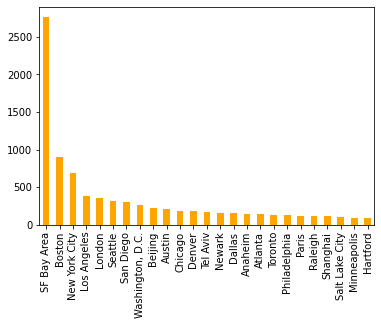

In [16]:
#Top 25 regions in terms of number of companies
df.region.value_counts()[:25].plot.bar(color ='orange')

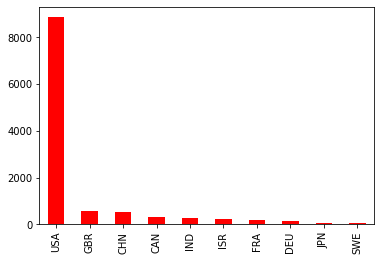

In [17]:
#Top 10 countries in terms of number of companies
df.country_code.value_counts()[:10].plot.bar(color ='red')

In [18]:
df.nlargest(15, 'funding_total_usd')

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
26150,Humacyte,http://humacyte.com,Biotechnology,1.997624e+08,operating,USA,NC,Raleigh,Morrisville,2,2004-01-01,2015-01-16,2015-10-20
15164,Deliveroo,https://deliveroo.co.uk/,Food Processing,1.995858e+08,operating,GBR,H9,London,London,4,2012-01-01,2014-06-26,2015-11-23
19044,Eventbrite,http://www.eventbrite.com,Event Management|Events|Online Reservations|Ti...,1.995750e+08,operating,USA,CA,SF Bay Area,San Francisco,10,2006-01-01,2006-11-01,2014-03-13
51681,SilkRoad Technology,http://www.silkroad.com,Career Management|Human Resources|Recruiting|S...,1.995000e+08,operating,USA,IL,Chicago,Chicago,8,2003-01-01,2003-01-01,2015-05-19
47782,Renewable Energy Group,http://www.regfuel.com,Chemicals|Clean Technology,1.987307e+08,ipo,USA,IA,Des Moines,Ames,1,1996-01-01,2008-06-27,2008-06-27
3147,Anacor Pharmaceutical,http://www.anacor.com,Biotechnology|Health Care,1.985000e+08,ipo,USA,CA,SF Bay Area,Palo Alto,8,2000-01-01,2002-11-01,2013-06-12
5173,Auxmoney,http://www.auxmoney.com,Finance,1.981774e+08,operating,DEU,7,Dusseldrof,DÃ¼sseldorf,3,2007-01-01,2013-03-12,2015-10-21
8544,Brightcove,http://www.brightcove.com,Analytics|Enterprise Software|Technology|Video,1.980077e+08,ipo,JPN,19,Tokyo,Shibuya,8,2004-01-01,2005-03-01,2014-02-10
7574,Blu Homes,http://www.bluhomes.com,Real Estate,1.975000e+08,operating,USA,CA,SF Bay Area,Vallejo,5,2008-01-01,2011-05-05,2015-01-14
42622,PayPal,https://www.paypal.com/home,E-Commerce|Finance|FinTech|Mobile Payments|P2P...,1.970000e+08,acquired,USA,CA,SF Bay Area,San Jose,5,1998-12-01,1999-01-01,2001-02-16


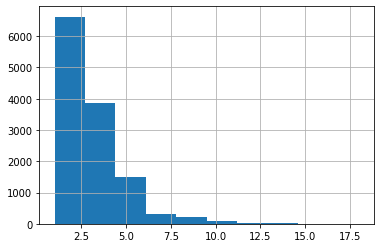

In [19]:
df.funding_rounds.hist()

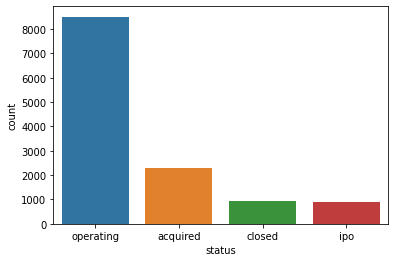

In [20]:
sns.countplot(df.status)

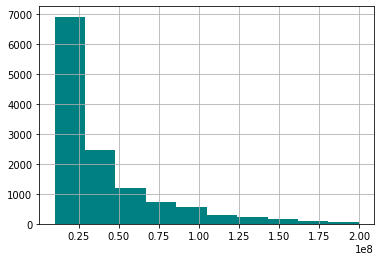

In [21]:
#Distribution of funding amounts
df.funding_total_usd.hist(color = 'teal')

In [22]:
df.funding_total_usd.describe()

count    1.264800e+04
mean     3.952278e+07
std      3.488139e+07
min      1.000000e+07
25%      1.558873e+07
50%      2.598428e+07
75%      4.970846e+07
max      1.997624e+08
Name: funding_total_usd, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

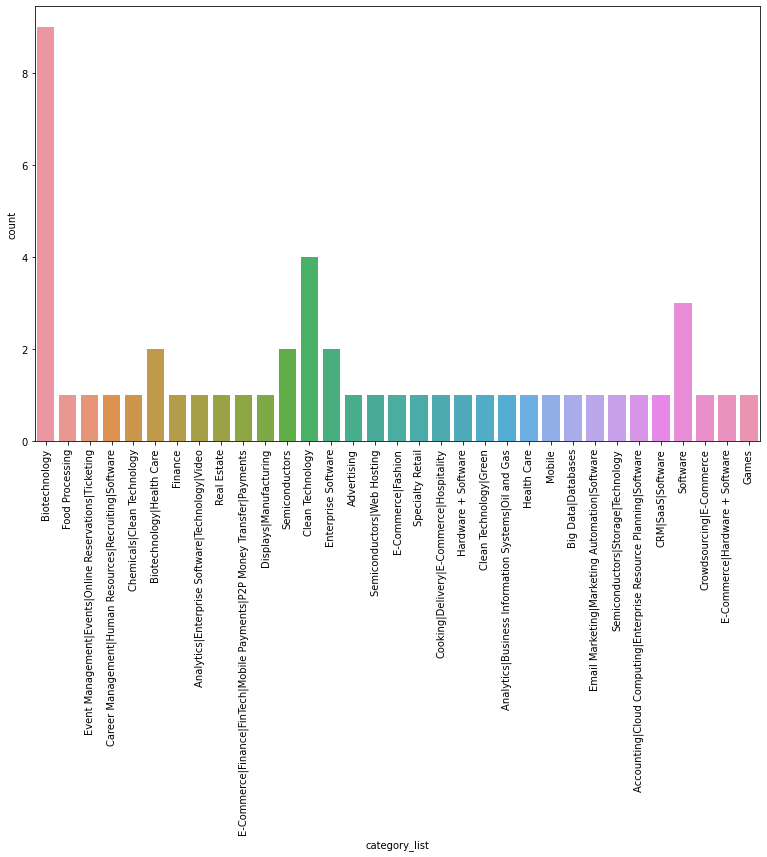

In [23]:
plt.figure(figsize=(13,8))
sns.countplot(df.nlargest(50, 'funding_total_usd').category_list)
plt.xticks(rotation=90)

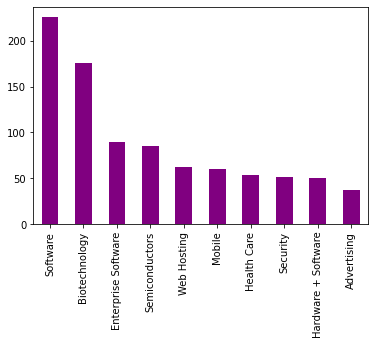

In [24]:
# Top 10 categories in terms of acquired companies
df[df.status == 'acquired'].category_list.value_counts().nlargest(10).plot.bar(color = 'purple')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 936x576 with 0 Axes>

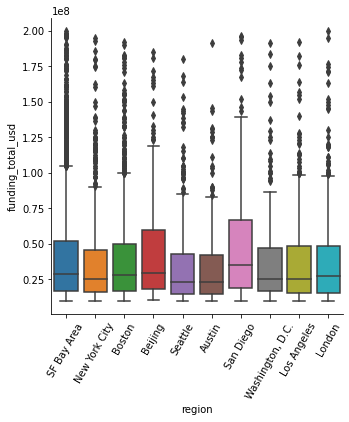

In [25]:
#Visualizing outliers in the top 10 regions
plt.figure(figsize=(13,8))
mask = df.region.isin(list(df.region.value_counts()[:10].index))
sns.catplot(x = 'region', y = 'funding_total_usd', data = df[mask] , kind = 'box')
plt.xticks(rotation=60)
